In [141]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import OPTICS
from scipy.cluster.hierarchy import fcluster, linkage
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [143]:
# Load your dataset
data = pd.read_excel('Cleaned_Steam_Dataset.xlsx')


In [145]:
# Select relevant columns for clustering
df = data[['User Reviews Count', 'Followers', 'User Ratings']]

In [147]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [149]:
# Set parameters for OPTICS
min_samples = 5  # Minimum number of samples to form a core point
xi = 0.05  # Determines the minimum steepness in the reachability plot
min_cluster_size = 0.05  # Minimum size of clusters (as a fraction of total points)

In [151]:
# Fit OPTICS
optics = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=min_cluster_size)
optics.fit(df_scaled)

OPTICS(min_cluster_size=0.05)

In [153]:
# Filter out infinite values from the reachability array
valid_reachability = optics.reachability_[np.isfinite(optics.reachability_)]
valid_ordering = optics.ordering_[np.isfinite(optics.reachability_)]


In [155]:
# Use hierarchical clustering on the valid reachability distances to extract 11 clusters
linkage_matrix = linkage(valid_reachability.reshape(-1, 1), method='ward')
cluster_labels = fcluster(linkage_matrix, t=11, criterion='maxclust')

In [157]:
# Map cluster labels back to the original data
mapped_labels = np.full(optics.reachability_.shape, -1)  # Default to -1 for noise
mapped_labels[valid_ordering] = cluster_labels

In [159]:
# Add cluster labels to the original dataset
data['Cluster'] = mapped_labels

In [161]:
# Calculate cluster statistics
cluster_stats = data.groupby('Cluster').mean(numeric_only=True).reset_index()
print("Cluster Statistics:")
print(cluster_stats)

Cluster Statistics:
    Cluster  Game's Age (Days)      Price     Followers  \
0        -1        1786.000000  99.990000  8.003220e+05   
1         1        1911.818182  39.535455  2.896443e+05   
2         2        2122.242424  38.626364  3.244082e+05   
3         3        2152.760000  42.482000  3.973128e+05   
4         4        2028.904110  38.303151  3.781876e+05   
5         5        2808.909091  40.899091  4.930195e+05   
6         6        1836.700000  40.240000  5.660437e+05   
7         7        3444.000000  15.490000  1.812895e+05   
8         8        1444.000000  29.990000  4.892040e+05   
9         9        3003.000000  49.720000  6.246810e+05   
10       10         974.000000  59.990000  1.011933e+06   
11       11        1260.000000  59.990000  1.214290e+05   

    User Review (On a scale of 1 to 7)  User Reviews Count  \
0                             6.000000       578915.000000   
1                             6.000000        97345.090909   
2                         

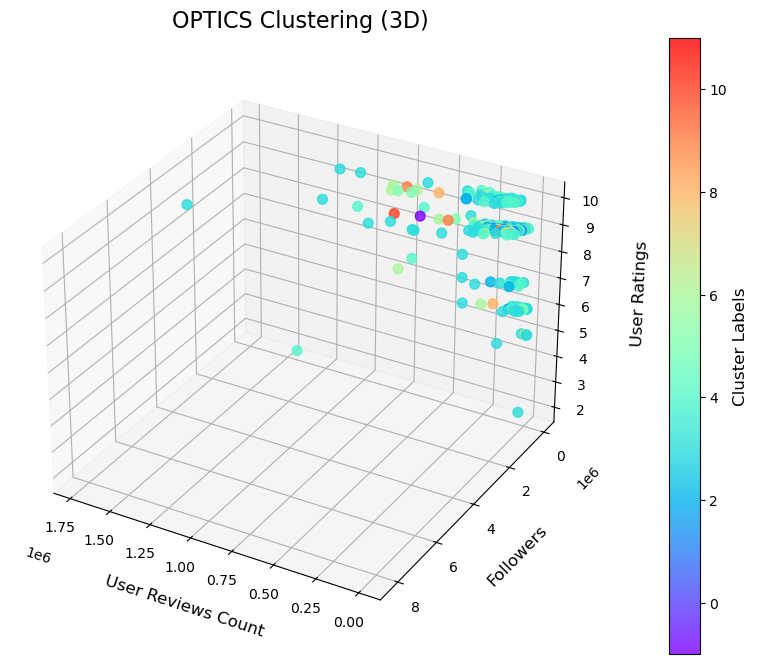

In [163]:
# 3D Visualization with enhancements
fig = plt.figure(figsize=(10, 8))  # Increased figure size
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with enhanced point size and transparency
scatter = ax.scatter(
    df['User Reviews Count'], 
    df['Followers'], 
    df['User Ratings'], 
    c=data['Cluster'], 
    cmap='rainbow', 
    s=50,  # Adjust point size
    alpha=0.8  # Add transparency for better visual depth
)

# Adding a color bar
colorbar = plt.colorbar(scatter, ax=ax, pad=0.1)
colorbar.set_label('Cluster Labels', fontsize=12)

# Setting axis labels with increased font size and labelpad adjustment
ax.set_xlabel('User Reviews Count', fontsize=12, labelpad=10)
ax.set_ylabel('Followers', fontsize=12, labelpad=10)
ax.set_zlabel('User Ratings', fontsize=12, labelpad=15)  # Adjusted labelpad for visibility

# Customizing ticks
ax.tick_params(axis='both', which='major', labelsize=10)

# Adding gridlines for better visualization
ax.grid(True)

# Setting title with customization
ax.set_title('OPTICS Clustering (3D)', fontsize=16, pad=20, loc='center')

# Adjusting view angle for better visibility of all labels
ax.view_init(elev=30, azim=120)  # Adjust elevation and azimuth for better perspective

# Show the plot
plt.show()


In [165]:
# Print Cluster Labels for each record
for index, row in data.iterrows():
    game_title = row['Title']  # Replace 'Title' with the appropriate column name for game identification
    cluster_label = row['Cluster']
    print(f'Game Title: {game_title}, Cluster Label: {cluster_label}')


Game Title: Red Dead Redemption 2, Cluster Label: -1
Game Title: Grand Theft Auto V, Cluster Label: 3
Game Title: ELDEN RING, Cluster Label: 10
Game Title: Black Myth: Wukong, Cluster Label: 6
Game Title: Cyberpunk 2077, Cluster Label: 3
Game Title: Rust, Cluster Label: 4
Game Title: Baldur's Gate 3, Cluster Label: 6
Game Title: The Witcher 3: Wild Hunt, Cluster Label: 6
Game Title: HELLDIVERS‚Ñ¢ 2, Cluster Label: 4
Game Title: Call of Duty¬Æ, Cluster Label: 3
Game Title: Tom Clancy's Rainbow Six¬Æ Siege, Cluster Label: 3
Game Title: New World: Aeternum, Cluster Label: 6
Game Title: DayZ, Cluster Label: 3
Game Title: DARK SOULS‚Ñ¢ III, Cluster Label: 3
Game Title: Sea of Thieves: 2024 Edition, Cluster Label: 6
Game Title: No Man's Sky, Cluster Label: 3
Game Title: Sid Meier‚Äôs Civilization¬Æ VI, Cluster Label: 3
Game Title: Forza Horizon 4, Cluster Label: 2
Game Title: Sekiro‚Ñ¢: Shadows Die Twice - GOTY Edition, Cluster Label: 4
Game Title: Hogwarts Legacy, Cluster Label: 4
Game Titl

In [167]:
# Save the labeled dataset
data.to_csv('Labeled_Steam_Dataset3.csv', index=False)
